## Advanced Lane Finding Project - Step 1
---
## Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [13]:
import pickle as pickle_module
import os
import numpy as np
import glob
import cv2
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

get_ipython().magic('matplotlib inline')

## Camera calibration class

In [14]:
IMAGE_SIZE = (1280, 720)
CALIBRATION_IMAGE_SIZE = (720, 1280, 3)
CALIBRATION_PICKLE_FILE = 'camera_calibration.pkl'
IMAGES_PATH = 'camera_cal/calibration*.jpg'
CHESSBOARD_ROWS = 6
CHESSBOARD_COLS = 9

class CameraCalibration:
    def __init__(self, image_size=IMAGE_SIZE, calibration_file=CALIBRATION_PICKLE_FILE):
        # Get camera calibration
        points_object, points_image = (unpickle(calibration_file) if os.path.exists(calibration_file)
                                       else self._calibrate())
        # Get mtx and dist to undistorted new images
        _, self.mtx, self.dist, _, _ = cv2.calibrateCamera(points_object, points_image, image_size, None, None)

    def undistort(self, image):
        return cv2.undistort(image, self.mtx, self.dist, None, self.mtx)
    
    def plot_images(self, image, image_path, save=False):
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.suptitle(image_path, fontsize=40)
        f.tight_layout()
        ax1.imshow(image)
        ax1.set_title('Original Image', fontsize=20)
        undistorted_image = self.undistort(image)
        ax2.imshow(undistorted_image)
        ax2.set_title('Undistorted Image', fontsize=20)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        if save:
            name = os.path.basename(image_path)
            f.savefig('./output_images/' + '{}{}'.format(name.split('.')[0], '_undistorted.png')) # save the figure to file
            plt.close(f) # close the figure
    
    @staticmethod
    def _calibrate(images_path=IMAGES_PATH, chessboard_rows=CHESSBOARD_ROWS, chessboard_cols=CHESSBOARD_COLS,
                   image_size=CALIBRATION_IMAGE_SIZE, calibration_pickle_file=CALIBRATION_PICKLE_FILE):
        obj = np.zeros((chessboard_rows * chessboard_cols, 3), np.float32)
        obj[:, :2] = np.mgrid[:chessboard_cols, :chessboard_rows].T.reshape(-1, 2)

        object_points = []
        image_points = []

        images = glob.glob(images_path)

        for image in images:
            image_array = imread(image)
            if image_array.shape != image_size:
                image_array = imresize(image_array, image_size)
            gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
            ret, corners = cv2.findChessboardCorners(gray, (chessboard_cols, chessboard_rows), None)

            if ret:
                object_points.append(obj)
                image_points.append(corners)

        calibration = (object_points, image_points)
        pickle(calibration, calibration_pickle_file)
        return calibration


def unpickle(file_path):
    with open(file_path, 'rb') as file_handle:
        pickled_object = pickle_module.load(file_handle)
        return pickled_object


def pickle(object_to_pickle, file_path):
    with open(file_path, 'wb') as file_handle:
        pickle_module.dump(object_to_pickle, file_handle)

In [15]:
calibration = CameraCalibration()

In [16]:
def plot_some_camera_calibration_images():
    images = glob.glob('camera_cal/calibration*.jpg')
    i = 0
    for image_path in images:
        img = cv2.imread(image_path)
        if i == 5 : break

        calibration.plot_images(img, image_path, False)
        i += 1

In [17]:
### Display Original and Calibrated Images side by side

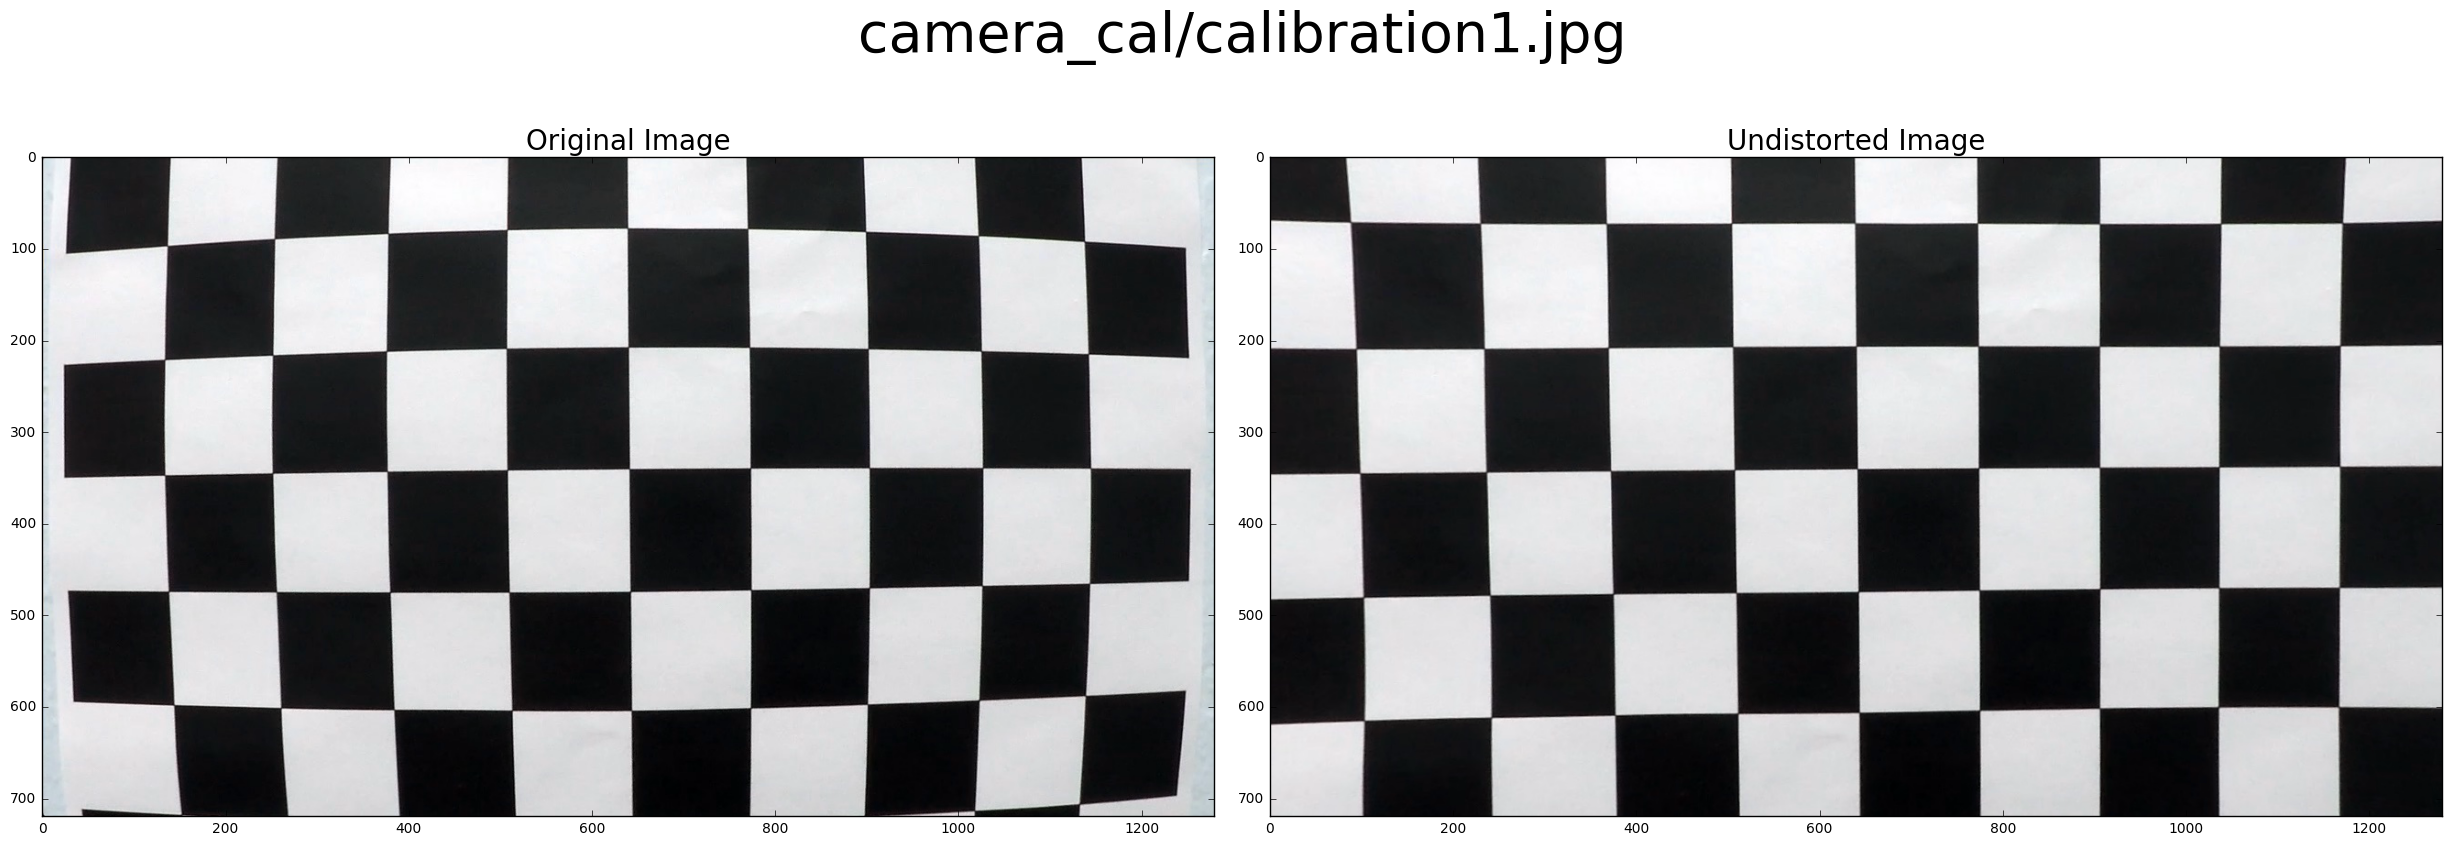

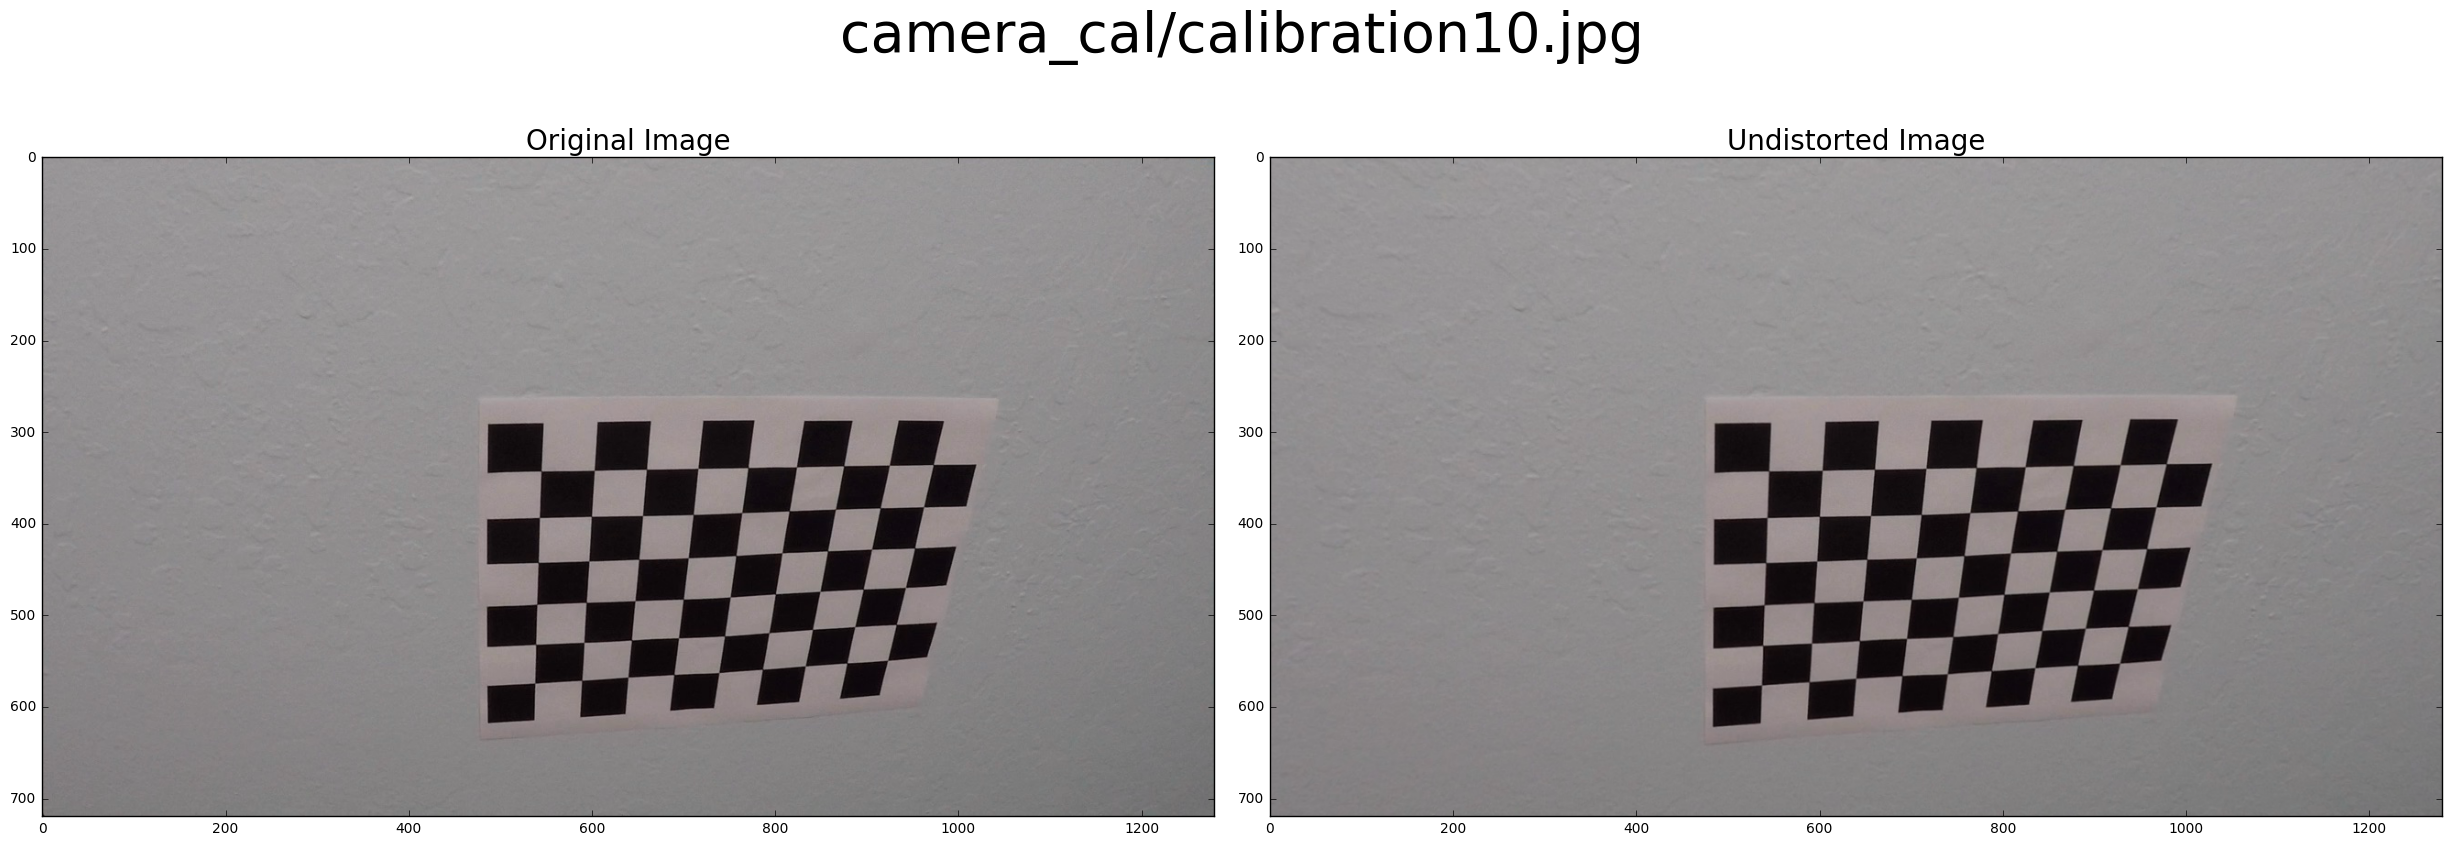

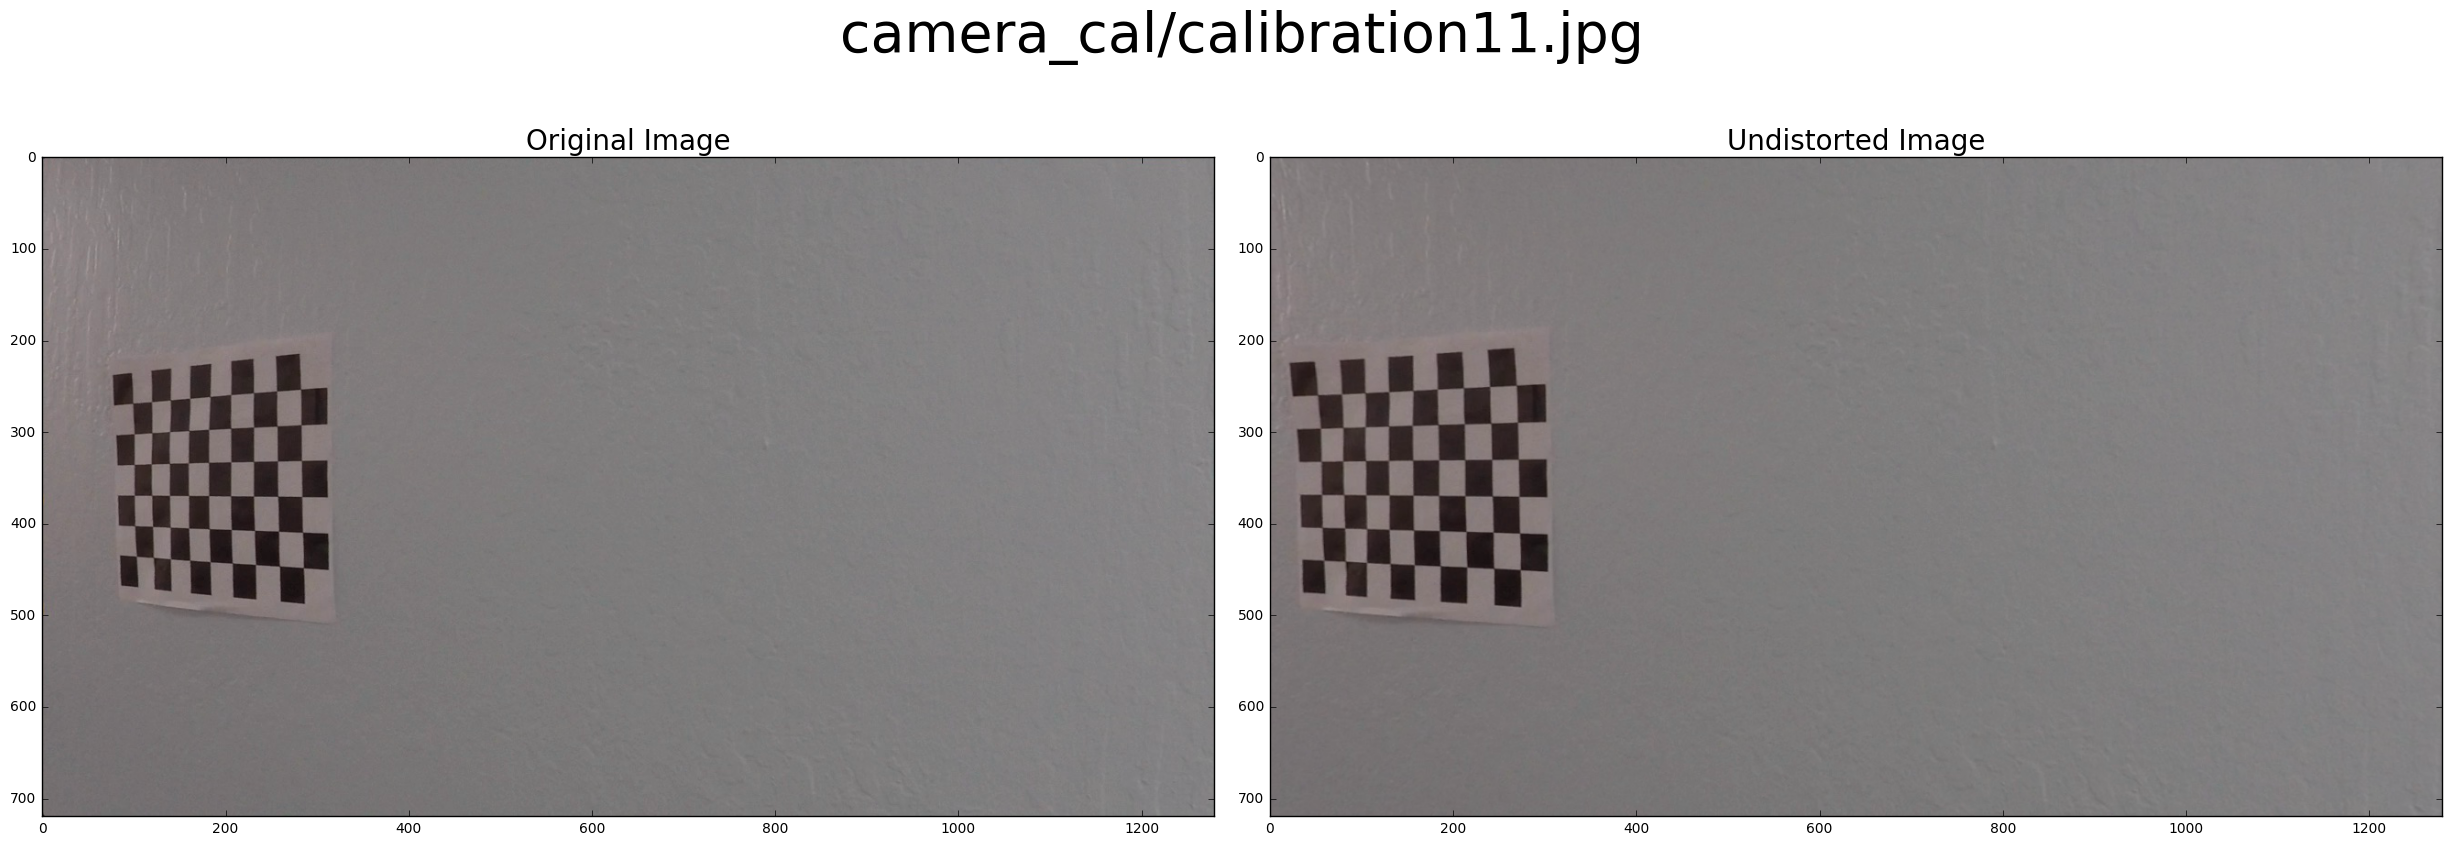

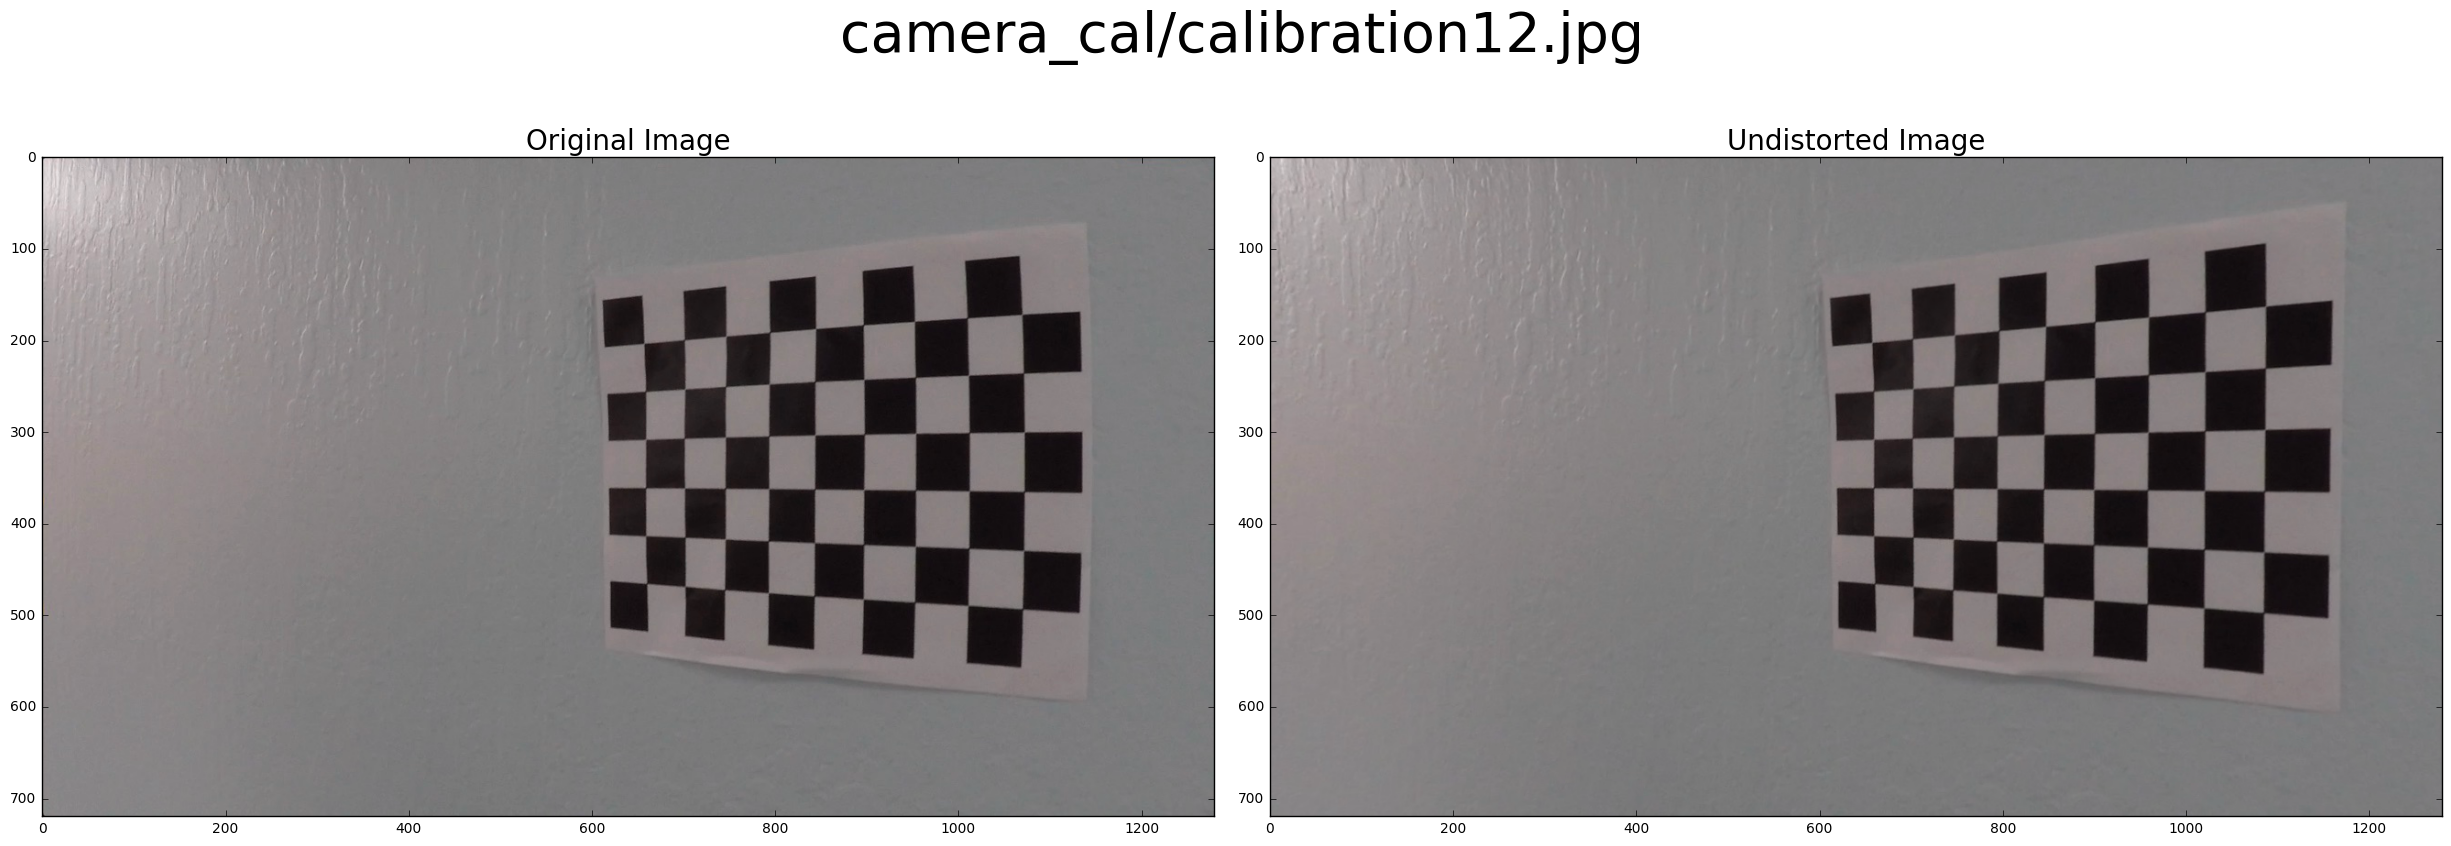

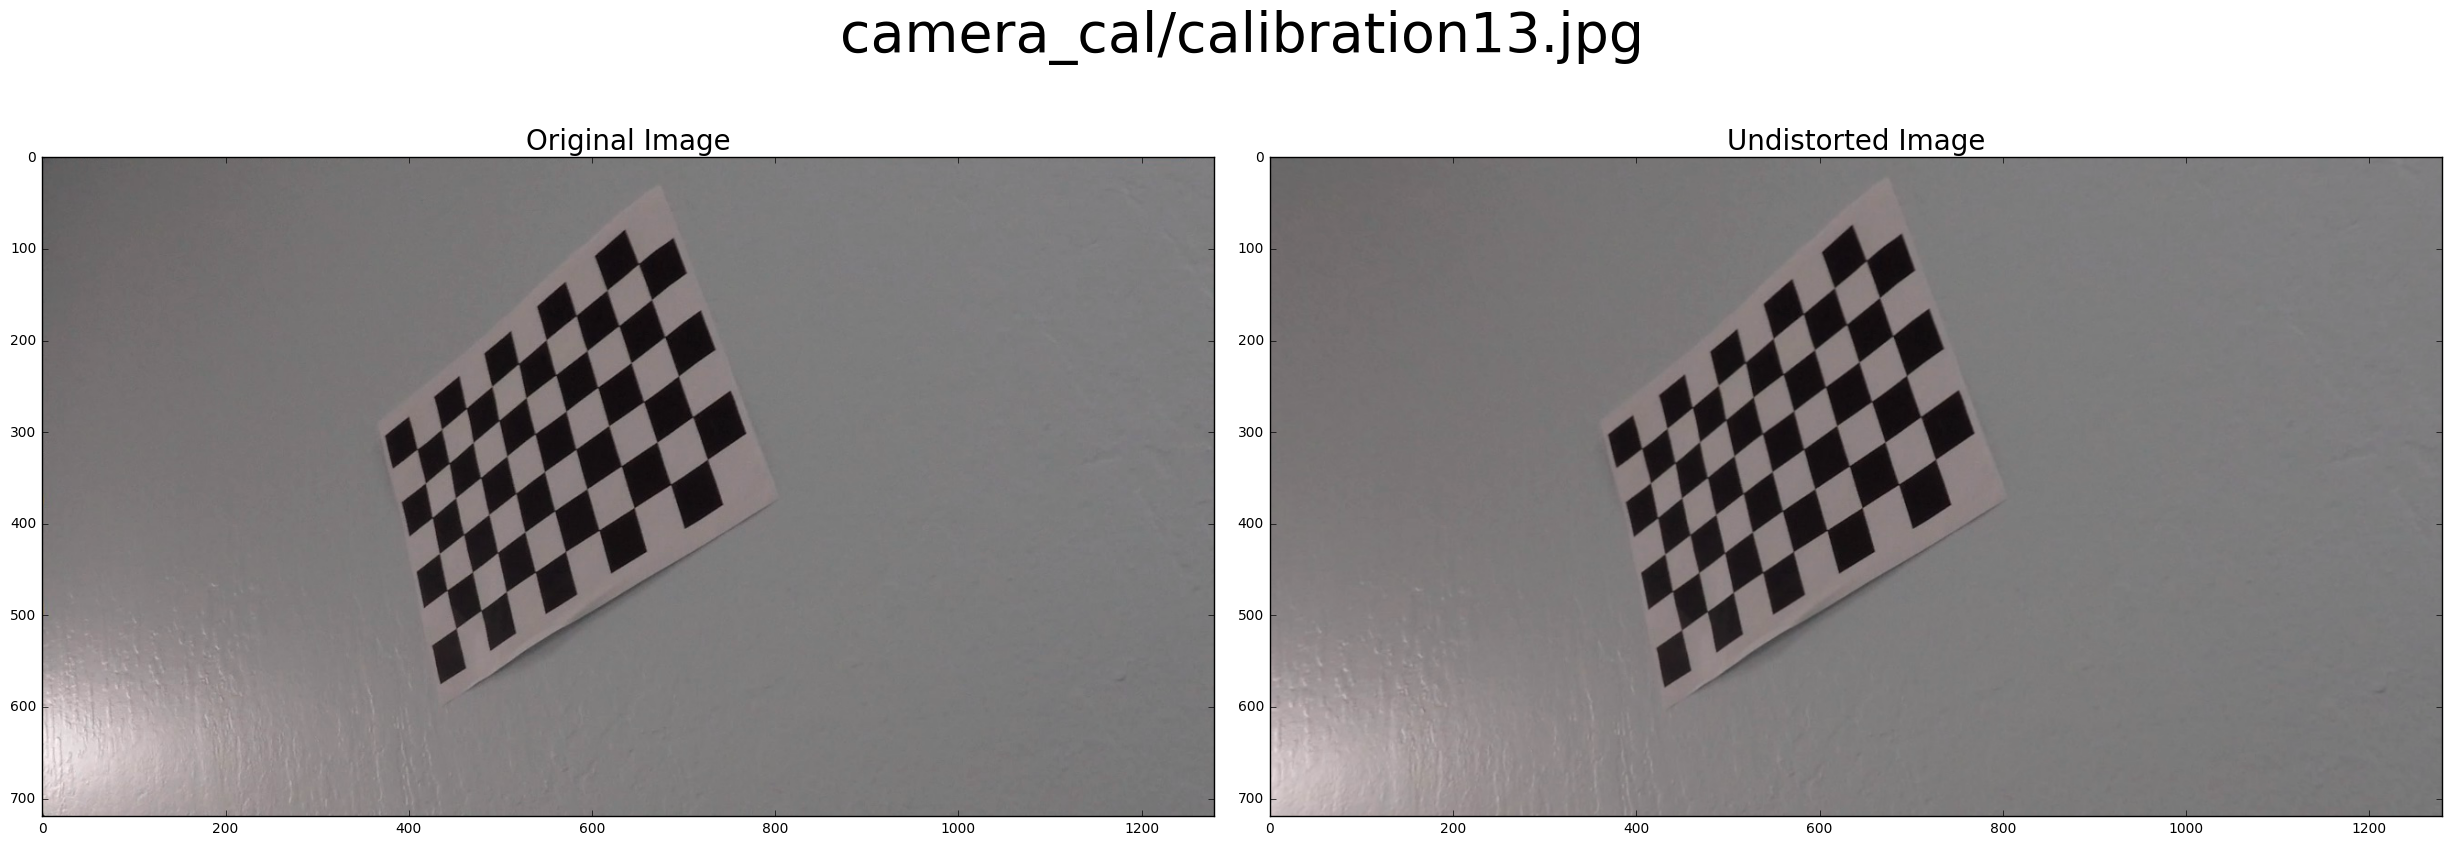

In [18]:
plot_some_camera_calibration_images()